In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim
seed = cfg_seed

env_str=cfg_env

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=10000
vae_lr=5e-4
print(datetime.datetime.now())

In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

c = 0.16346495489906906
c = 0.19376823391999684
c = 0.2675319002346239
c = 0.1150324556477333
c = 0.15866847592587133
c = 0.2776789914877983
c = 0.02613878991046221
c = 0.2497859536643814
c = 0.2610036444740457
c = 0.23974756926501706
c = 0.23415875288593663
c = 0.19197630639825713
c = 0.28340067511487516
c = 0.12439858199715707
c = 0.232270106830265
c = 0.17053018466059455
c = 0.1852906491227631
c = 0.18508019906242706
c = 0.20454608973104502
c = 0.13110958613980242
c = 0.01806764148878095
c = 0.2011913608854478
c = 0.03867788929645599
c = 0.10911323128278679
c = 0.1315804540386961
c = 0.03061344322440842
c = 0.04839285536549887
c = 0.07598748076193464
c = 0.07332767760048083
c = 0.03311254234929154
c = 0.04145488540458414
c = 0.11061755119828923
c = 0.02913038273791838
c = 0.02882952236818892
c = 0.14059536049431046
c = 0.18145365592351378
c = 0.011756337676296202
c = 0.03605896836395067
c = 0.035618315686273216
c = 0.12427889835440098
c = 0.20774163581100594
c = 0.07961684728183362


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-317.8297)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
}

vi = vi_base.baseVI(args_init_dict)

In [7]:
vi.get_real_rollout_mdppolicy_data()

0  c = 0.05388110326789044
1  c = 0.2827750799093791
2  c = 0.15731394332316598
3  c = 0.20314234323342722
4  c = 0.15063167421723392
5  c = 0.2724745137703737
6  c = 0.24329451948004602
7  c = 0.03448564489113446
8  c = 0.12566772795552447
9  c = 0.004399746291621242
10  c = 0.031227579640040103
11  c = 0.09497532330898585
12  c = 0.05687215975334853
13  c = 0.23462364322715343
14  c = 0.10108839803214642
15  c = 0.2078441288160539
16  c = 0.04046623426986205
17  c = 0.1695736073349321
18  c = 0.288753688287829
19  c = 0.16412304069194752
20  c = 0.044365065601949014
21  c = 0.23163072784674504
22  c = 0.047219234627092245
23  c = 0.23200469991445097
24  c = 0.21868805929359805
25  c = 0.29750590192818915
26  c = 0.24245242700472103
27  c = 0.2488176727931419
28  c = 0.1037594269002593
29  c = 0.03450842388232006
30  c = 0.2899819933464779
31  c = 0.17124773921915185
32  c = 0.07015124845123409
33  c = 0.0036764408548930925
34  c = 0.07202494056398641
35  c = 0.08517896100238877
36  c

tensor(4.2174)tensor(6.7906)tensor(4.1837)tensor(4.0845)tensor(3.3757)tensor(2.7983)tensor(6.5985)tensor(3.2533)tensor(3.3910)tensor(3.4194)tensor(5.5616)tensor(3.0737)tensor(3.4738)tensor(4.4845)tensor(3.6484)tensor(3.9607)tensor(5.8678)tensor(2.9320)tensor(3.2793)tensor(4.2349)tensor(8.7709)tensor(4.2933)tensor(5.9589)tensor(4.4262)tensor(6.8228)tensor(8.2876)tensor(4.3570)tensor(6.3435)tensor(6.6764)tensor(6.0235)tensor(6.9046)tensor(6.7860)tensor(7.7608)tensor(6.6307)tensor(4.2093)tensor(3.1324)tensor(6.7651)tensor(7.5391)tensor(4.5229)tensor(5.5176)tensor(3.0883)tensor(4.7579)tensor(7.5344)tensor(3.1287)tensor(4.7149)tensor(3.5165)tensor(8.7729)tensor(7.5833)tensor(8.6948)tensor(6.7234)tensor(2.8375)tensor(4.4622)tensor(5.1265)tensor(3.2673)tensor(6.2211)tensor(4.3933)tensor(4.5403)tensor(4.5373)tensor(6.3223)tensor(6.9189)tensor(3.1334)tensor(4.9018)tensor(5.6586)tensor(7.2067)tensor(6.2344)tensor(3.6265)tensor(3.1981)tensor(3.4820)tensor(3.2140)tensor(5.2448)tensor(3.1958)tensor

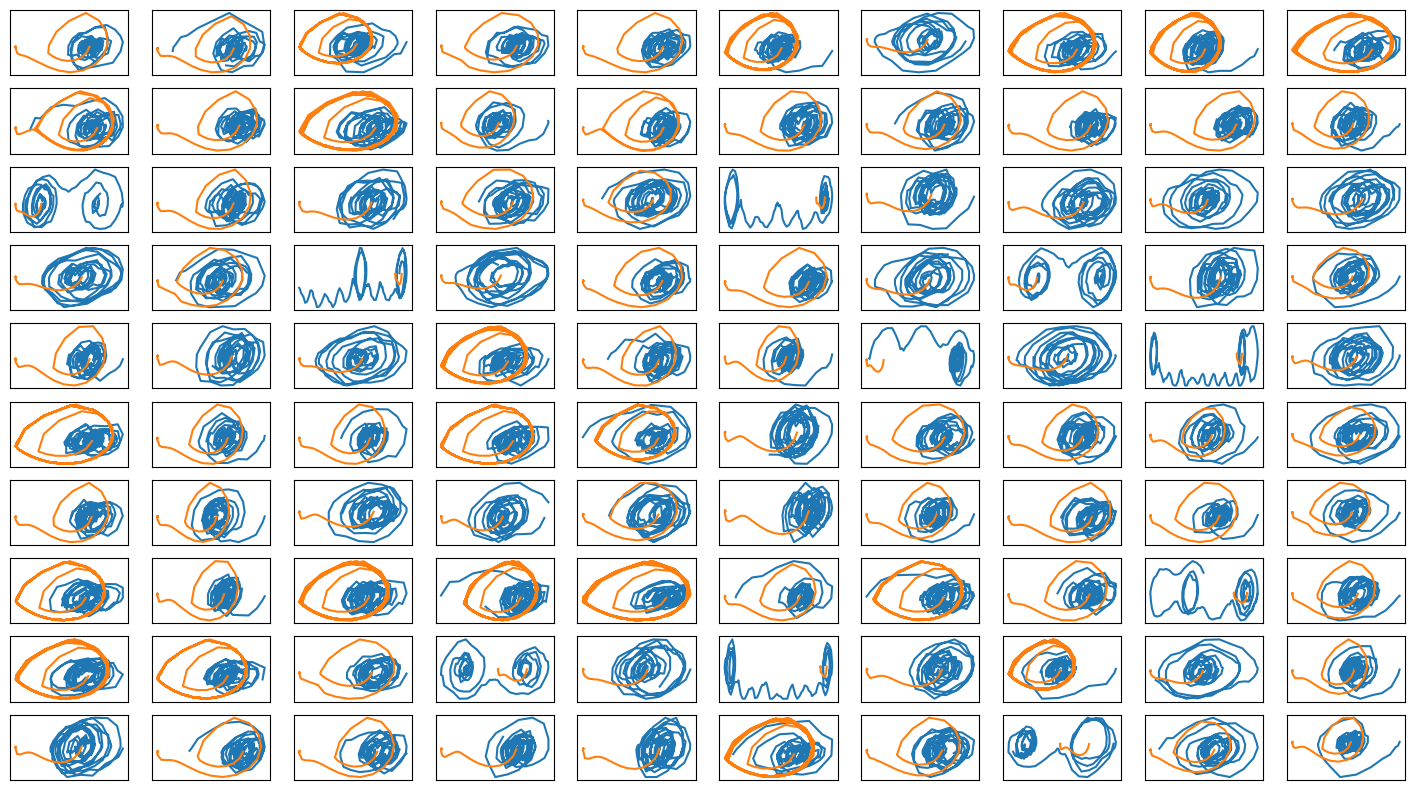

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
# -0.025968981297931983
# tensor([0.5385])


In [10]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()

train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()

train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])

# vi.save()


train_vae: enc_dec
train: iter 0  trainloss 895.82577  validloss 521.79106±0.00000  bestvalidloss 521.79106  last_update 0
train: iter 1  trainloss 443.73359  validloss 385.00533±0.00000  bestvalidloss 385.00533  last_update 0
train: iter 2  trainloss 411.65420  validloss 328.62563±0.00000  bestvalidloss 328.62563  last_update 0
train: iter 3  trainloss 390.55758  validloss 334.35339±0.00000  bestvalidloss 328.62563  last_update 1
train: iter 4  trainloss 377.51921  validloss 285.04889±0.00000  bestvalidloss 285.04889  last_update 0
train: iter 5  trainloss 399.83683  validloss 282.79389±0.00000  bestvalidloss 282.79389  last_update 0
train: iter 6  trainloss 380.48155  validloss 362.43432±0.00000  bestvalidloss 282.79389  last_update 1
train: iter 7  trainloss 330.93203  validloss 287.68509±0.00000  bestvalidloss 282.79389  last_update 2
train: iter 8  trainloss 325.89677  validloss 268.24997±0.00000  bestvalidloss 268.24997  last_update 0
train: iter 9  trainloss 320.42381  validloss

train: iter 77  trainloss -454.21012  validloss -604.52942±0.00000  bestvalidloss -609.60998  last_update 2
train: iter 78  trainloss -452.26240  validloss -630.19340±0.00000  bestvalidloss -630.19340  last_update 0
train: iter 79  trainloss -466.68465  validloss -646.46851±0.00000  bestvalidloss -646.46851  last_update 0
train: iter 80  trainloss -472.79687  validloss -634.46062±0.00000  bestvalidloss -646.46851  last_update 1
train: iter 81  trainloss -483.20998  validloss -663.66909±0.00000  bestvalidloss -663.66909  last_update 0
train: iter 82  trainloss -492.89236  validloss -673.91014±0.00000  bestvalidloss -673.91014  last_update 0
train: iter 83  trainloss -504.39270  validloss -667.93230±0.00000  bestvalidloss -673.91014  last_update 1
train: iter 84  trainloss -504.98055  validloss -678.84743±0.00000  bestvalidloss -678.84743  last_update 0
train: iter 85  trainloss -503.83549  validloss -684.68027±0.00000  bestvalidloss -684.68027  last_update 0
train: iter 86  trainloss -5

train: iter 153  trainloss -643.41226  validloss -806.57188±0.00000  bestvalidloss -812.18663  last_update 1
train: iter 154  trainloss -656.16738  validloss -799.54286±0.00000  bestvalidloss -812.18663  last_update 2
train: iter 155  trainloss -650.34228  validloss -805.73367±0.00000  bestvalidloss -812.18663  last_update 3
train: iter 156  trainloss -611.98981  validloss -767.76010±0.00000  bestvalidloss -812.18663  last_update 4
train: iter 157  trainloss -650.46807  validloss -777.80810±0.00000  bestvalidloss -812.18663  last_update 5
train: iter 158  trainloss -645.37230  validloss -800.85347±0.00000  bestvalidloss -812.18663  last_update 6
train: iter 159  trainloss -620.74486  validloss -819.13257±0.00000  bestvalidloss -819.13257  last_update 0
train: iter 160  trainloss -625.46606  validloss -773.25372±0.00000  bestvalidloss -819.13257  last_update 1
train: iter 161  trainloss -634.08472  validloss -769.44847±0.00000  bestvalidloss -819.13257  last_update 2
train: iter 162  tr

train: iter 229  trainloss -679.29451  validloss -842.14252±0.00000  bestvalidloss -854.92014  last_update 2
train: iter 230  trainloss -673.94757  validloss -845.01426±0.00000  bestvalidloss -854.92014  last_update 3
train: iter 231  trainloss -675.19695  validloss -765.78509±0.00000  bestvalidloss -854.92014  last_update 4
train: iter 232  trainloss -690.90544  validloss -845.26126±0.00000  bestvalidloss -854.92014  last_update 5
train: iter 233  trainloss -689.81517  validloss -837.90495±0.00000  bestvalidloss -854.92014  last_update 6
train: iter 234  trainloss -620.98315  validloss -847.59449±0.00000  bestvalidloss -854.92014  last_update 7
train: iter 235  trainloss -599.37070  validloss -792.05260±0.00000  bestvalidloss -854.92014  last_update 8
train: iter 236  trainloss -665.26012  validloss -838.11459±0.00000  bestvalidloss -854.92014  last_update 9
train: iter 237  trainloss -660.50302  validloss -804.90865±0.00000  bestvalidloss -854.92014  last_update 10
train: iter 238  t

train: iter 304  trainloss -693.20351  validloss -865.70169±0.00000  bestvalidloss -879.40351  last_update 23
train: iter 305  trainloss -683.06794  validloss -855.21319±0.00000  bestvalidloss -879.40351  last_update 24
train: iter 306  trainloss -699.56170  validloss -868.44734±0.00000  bestvalidloss -879.40351  last_update 25
train: iter 307  trainloss -695.59998  validloss -845.75778±0.00000  bestvalidloss -879.40351  last_update 26
train: iter 308  trainloss -702.76408  validloss -785.02616±0.00000  bestvalidloss -879.40351  last_update 27
train: iter 309  trainloss -706.02183  validloss -875.57755±0.00000  bestvalidloss -879.40351  last_update 28
train: iter 310  trainloss -698.85393  validloss -858.21118±0.00000  bestvalidloss -879.40351  last_update 29
train: iter 311  trainloss -688.40129  validloss -879.73900±0.00000  bestvalidloss -879.73900  last_update 0
train: iter 312  trainloss -694.82010  validloss -867.00914±0.00000  bestvalidloss -879.73900  last_update 1
train: iter 

train: iter 379  trainloss -713.01609  validloss -901.67324±0.00000  bestvalidloss -901.67324  last_update 0
train: iter 380  trainloss -718.76914  validloss -872.26076±0.00000  bestvalidloss -901.67324  last_update 1
train: iter 381  trainloss -707.49603  validloss -807.37432±0.00000  bestvalidloss -901.67324  last_update 2
train: iter 382  trainloss -716.68158  validloss -837.79005±0.00000  bestvalidloss -901.67324  last_update 3
train: iter 383  trainloss -663.21556  validloss -834.17175±0.00000  bestvalidloss -901.67324  last_update 4
train: iter 384  trainloss -712.97705  validloss -846.57721±0.00000  bestvalidloss -901.67324  last_update 5
train: iter 385  trainloss -700.88424  validloss -867.57715±0.00000  bestvalidloss -901.67324  last_update 6
train: iter 386  trainloss -710.85627  validloss -883.70143±0.00000  bestvalidloss -901.67324  last_update 7
train: iter 387  trainloss -720.62400  validloss -871.25354±0.00000  bestvalidloss -901.67324  last_update 8
train: iter 388  tr

train: iter 454  trainloss -721.02260  validloss -886.39228±0.00000  bestvalidloss -904.90200  last_update 59
train: iter 455  trainloss -721.85368  validloss -884.96291±0.00000  bestvalidloss -904.90200  last_update 60
train: iter 456  trainloss -720.86149  validloss -879.03224±0.00000  bestvalidloss -904.90200  last_update 61
train: iter 457  trainloss -702.94329  validloss -864.88546±0.00000  bestvalidloss -904.90200  last_update 62
train: iter 458  trainloss -711.73750  validloss -762.83086±0.00000  bestvalidloss -904.90200  last_update 63
train: iter 459  trainloss -732.91064  validloss -888.06893±0.00000  bestvalidloss -904.90200  last_update 64
train: iter 460  trainloss -729.74729  validloss -833.51306±0.00000  bestvalidloss -904.90200  last_update 65
train: iter 461  trainloss -720.81205  validloss -894.83542±0.00000  bestvalidloss -904.90200  last_update 66
train: iter 462  trainloss -710.84043  validloss -884.24959±0.00000  bestvalidloss -904.90200  last_update 67
train: ite

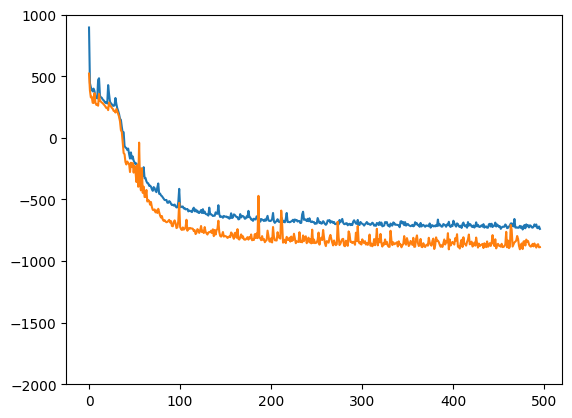

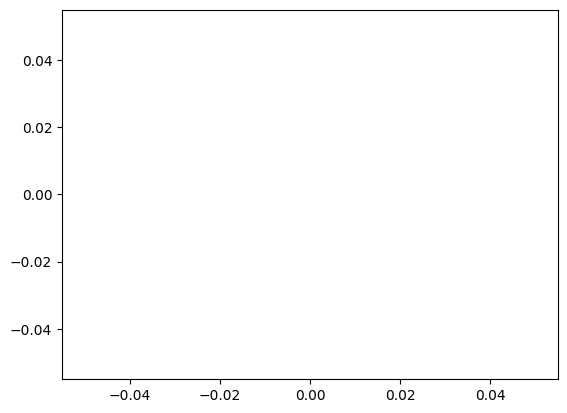

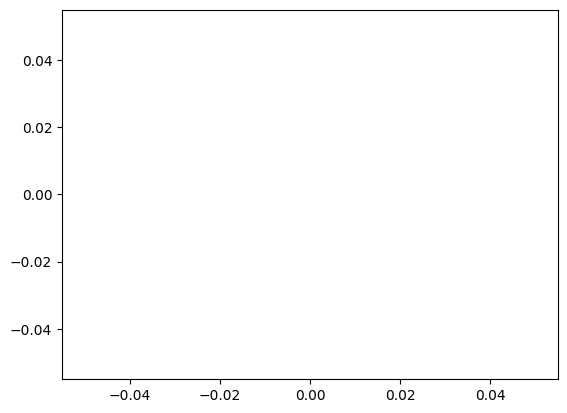

In [11]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

plt.plot(train_curve2)
plt.plot(valid_curve2)
plt.show()

plt.plot(train_curve3)
plt.plot(valid_curve3)
plt.show()

In [12]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [13]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  c = 0.1172537976600949
1  c = 0.09668545021826244
2  c = 0.07998353094471396
3  c = 0.043134578770909905
4  c = 0.28739392654817164
5  c = 0.05793545721253115
6  c = 0.11301763656251365
7  c = 0.13659130402904793
8  c = 0.009554453680182096
9  c = 0.01821420118903778
10  c = 0.2248779753397027
11  c = 0.1704713630920128
12  c = 0.12398327610611819
13  c = 0.28457260414006147
14  c = 0.2133023459253287
15  c = 0.08825633212425231
16  c = 0.14374932137584978
17  c = 0.01427891048724298
18  c = 0.2874608306321911
19  c = 0.21785454535020546
20  c = 0.19238060897568304
21  c = 0.10587088441389904
22  c = 0.2930605330845779
23  c = 0.0064640816033474935
24  c = 0.05592268305910889
25  c = 0.004722579819428496
26  c = 0.14283719226634486
27  c = 0.14238886534183406
28  c = 0.21758496814152897
29  c = 0.21928038134795677
30  c = 0.0600025336163541
31  c = 0.12362052850450467
32  c = 0.060822477707602414
33  c = 0.16928238807439291
34  c = 0.0813475799355884
35  c = 0.039758988713929695
36 

97  c = 0.02357092657525146
98  c = 0.2205211732789187
99  c = 0.23448130825941293
 


実環境方策rollout vs Sim環境方策rollout


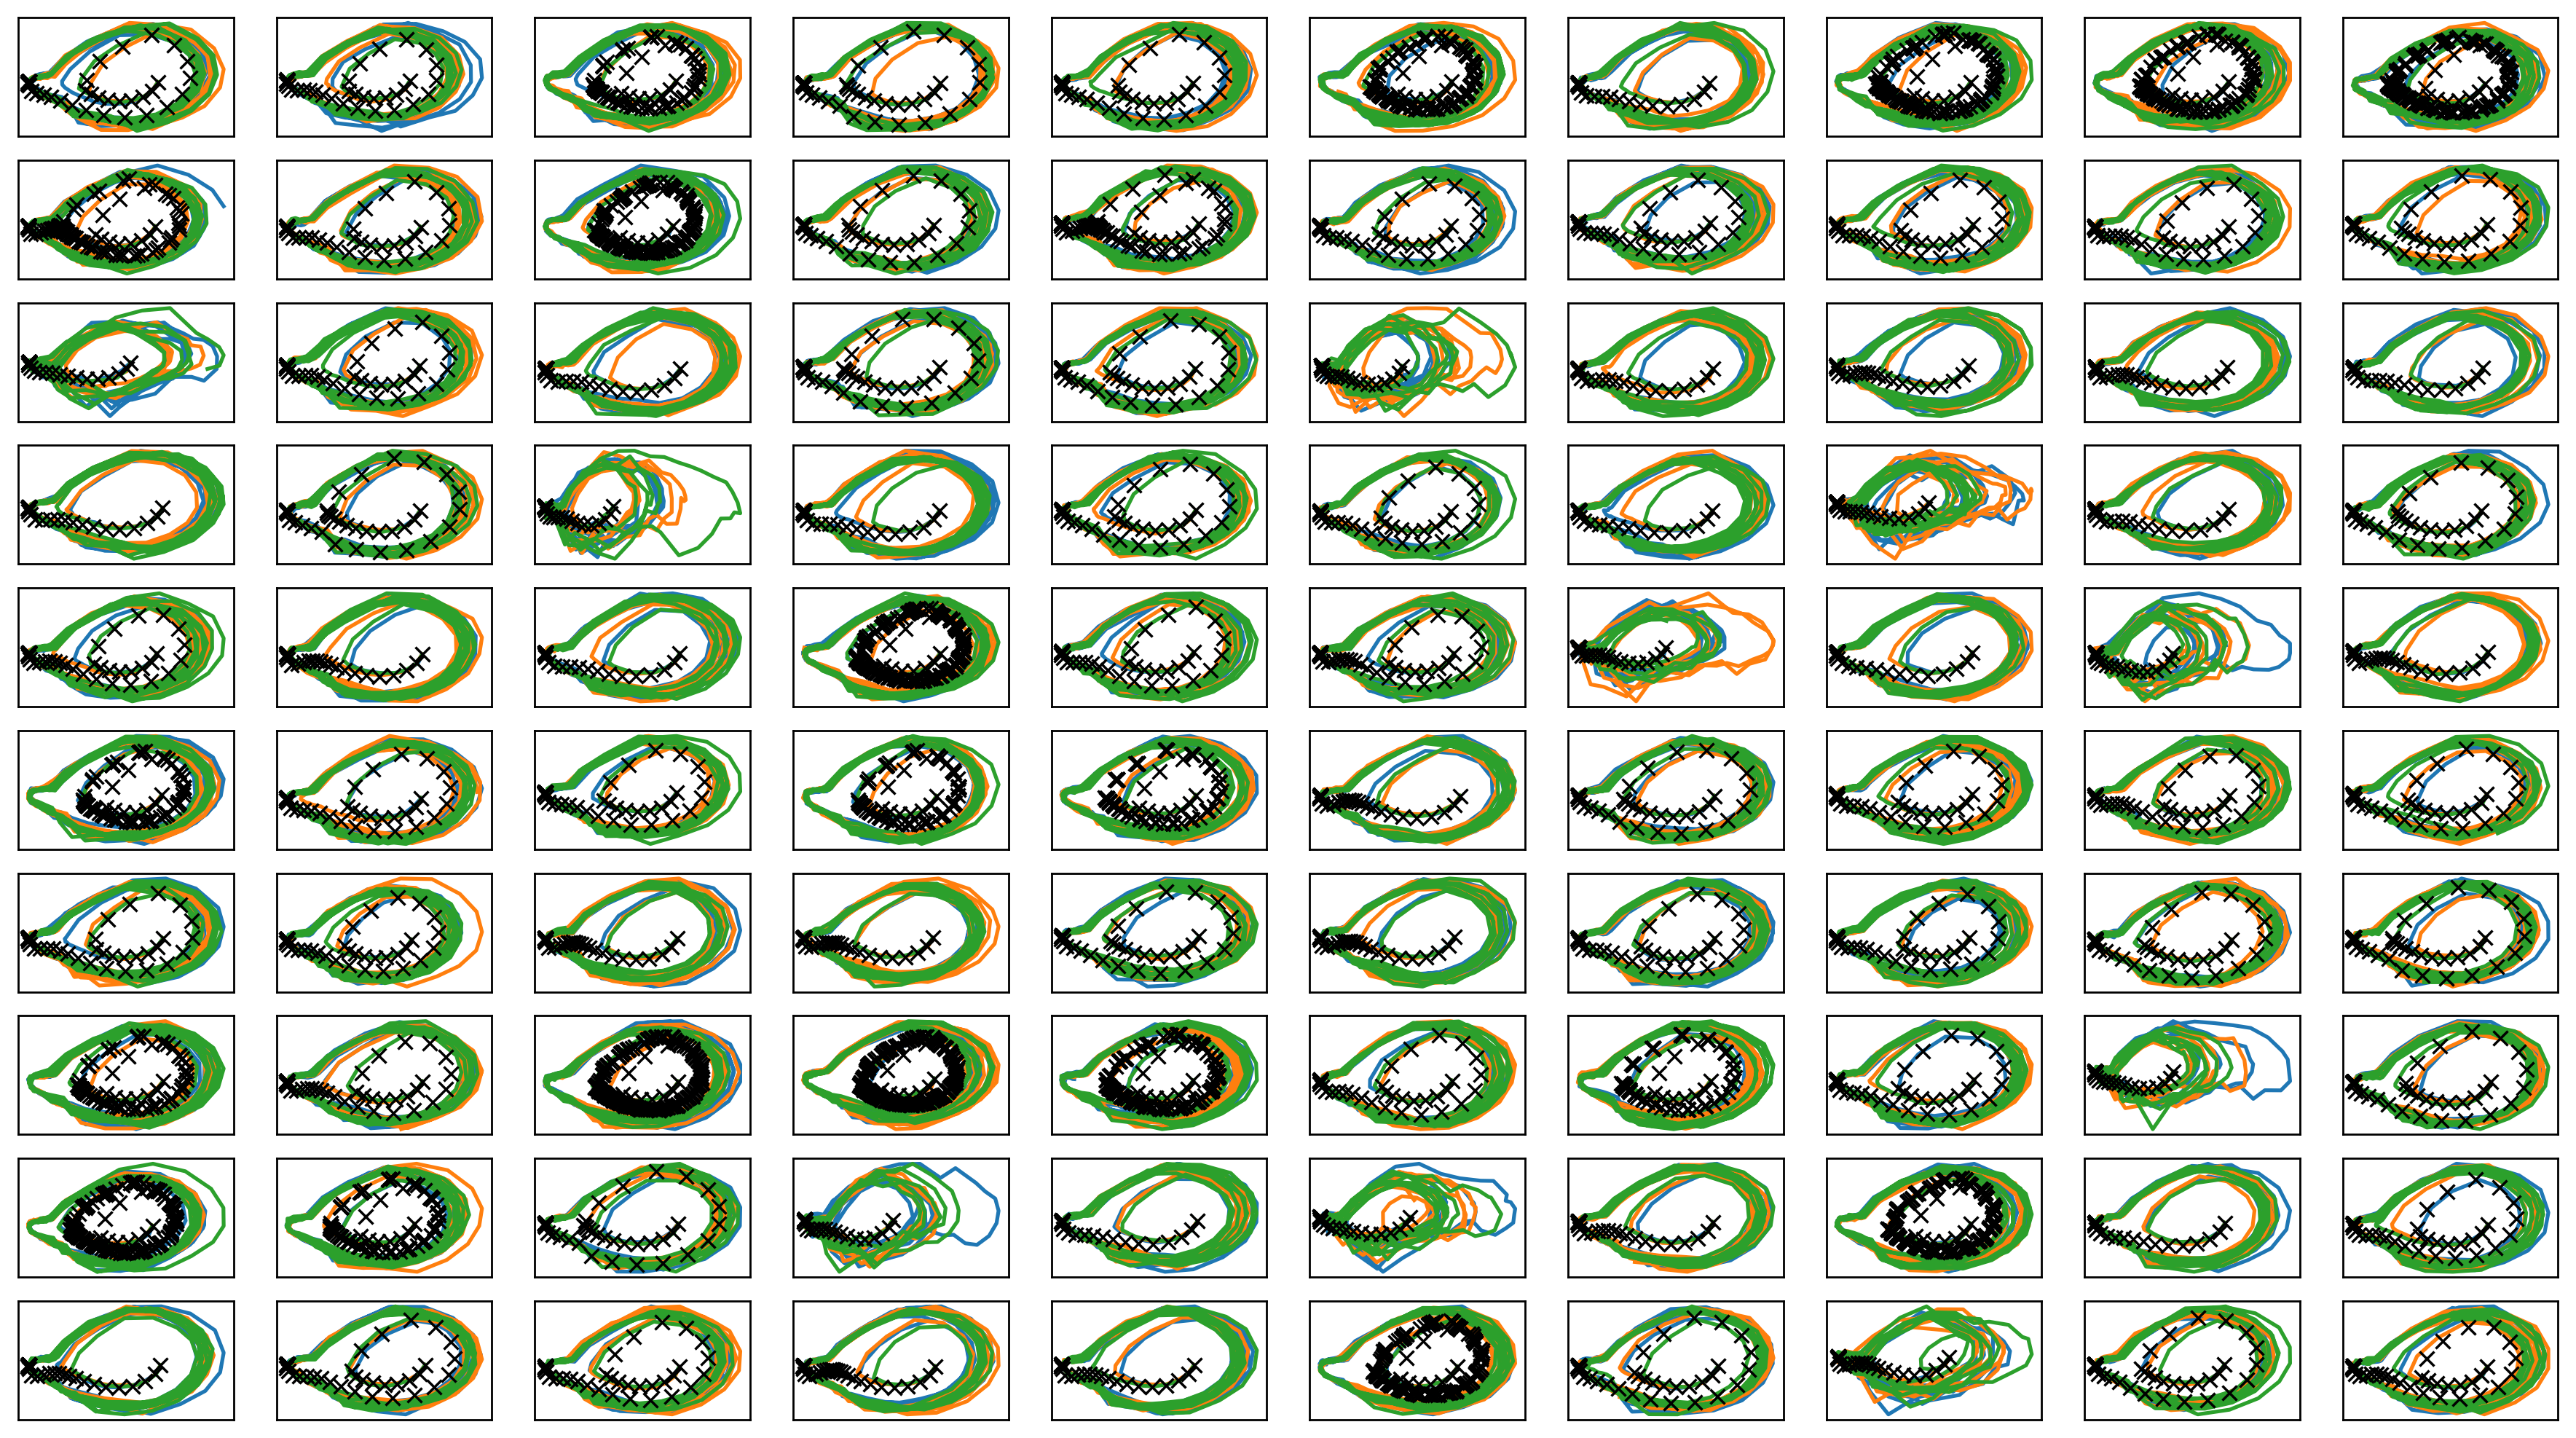

In [14]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

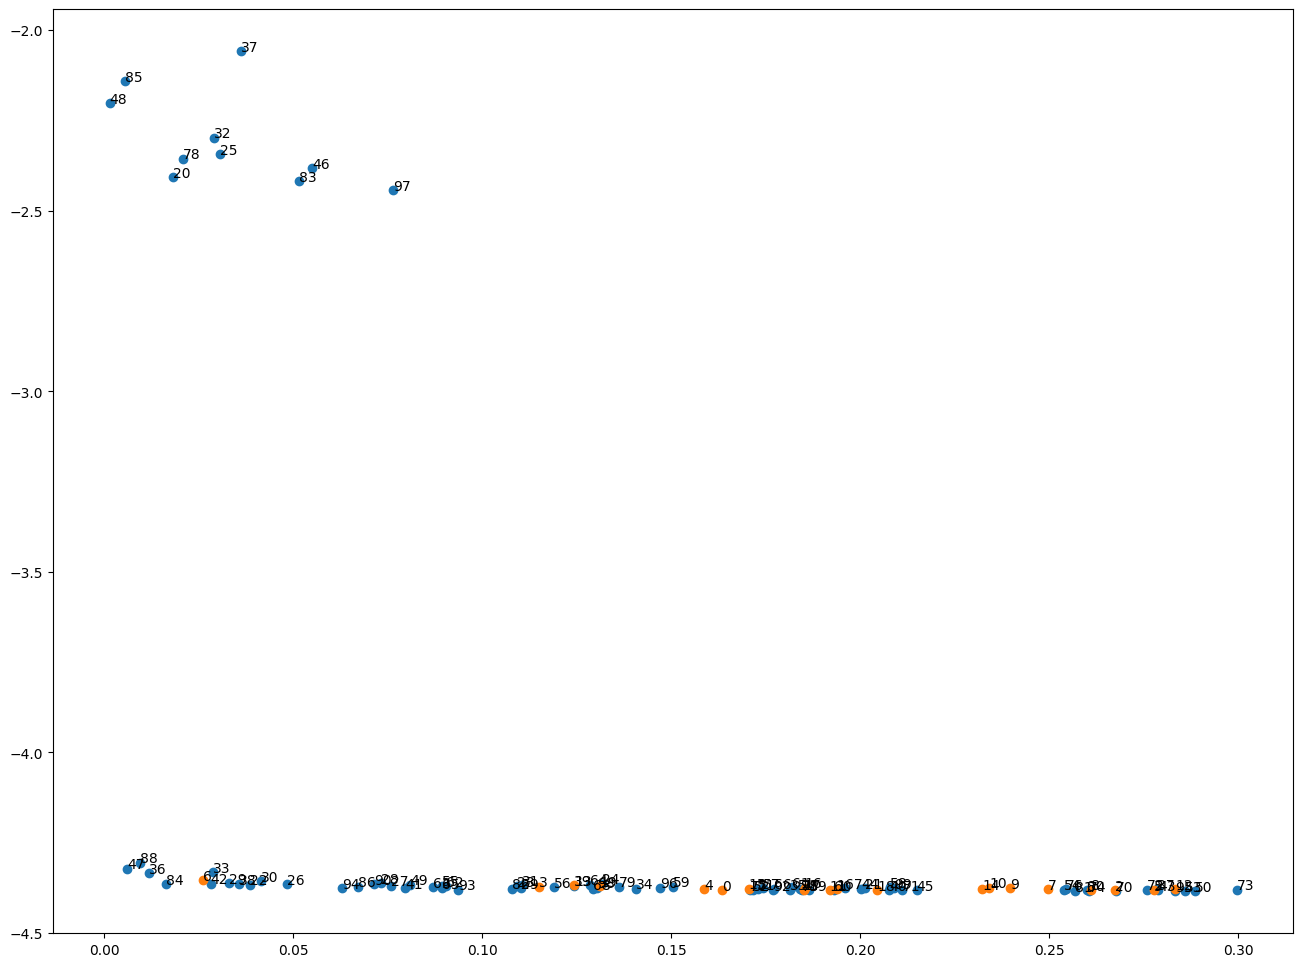

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [15]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


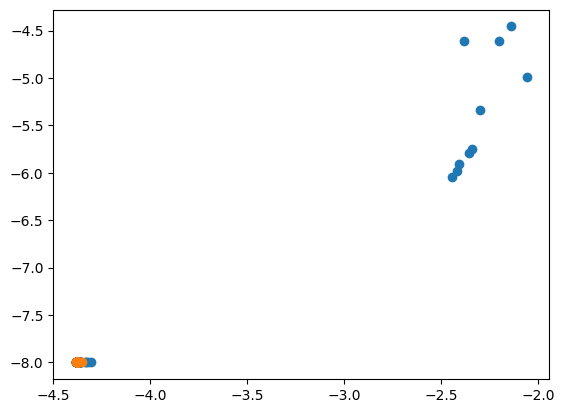

In [16]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [17]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 9.16471  validloss 10.54505±0.00000  bestvalidloss 10.54505  last_update 0
train: iter 1  trainloss 8.34692  validloss 9.54102±0.00000  bestvalidloss 9.54102  last_update 0
train: iter 2  trainloss 7.63633  validloss 8.70020±0.00000  bestvalidloss 8.70020  last_update 0
train: iter 3  trainloss 7.03371  validloss 8.00089±0.00000  bestvalidloss 8.00089  last_update 0
train: iter 4  trainloss 6.52392  validloss 7.36734±0.00000  bestvalidloss 7.36734  last_update 0
train: iter 5  trainloss 6.07550  validloss 6.85140±0.00000  bestvalidloss 6.85140  last_update 0
train: iter 6  trainloss 5.67016  validloss 6.40119±0.00000  bestvalidloss 6.40119  last_update 0
train: iter 7  trainloss 5.33692  validloss 5.96849±0.00000  bestvalidloss 5.96849  last_update 0
train: iter 8  trainloss 5.02446  validloss 5.60931±0.00000  bestvalidloss 5.60931  last_update 0
train: iter 9  trainloss 4.76051  validloss 5.30238±0.00000  bestvalidloss 5.30238  last_update 0
train: iter 10  tr

train: iter 86  trainloss 1.16855  validloss 0.99525±0.00000  bestvalidloss 0.99525  last_update 0
train: iter 87  trainloss 1.14710  validloss 0.96400±0.00000  bestvalidloss 0.96400  last_update 0
train: iter 88  trainloss 1.12797  validloss 0.94738±0.00000  bestvalidloss 0.94738  last_update 0
train: iter 89  trainloss 1.11703  validloss 0.92297±0.00000  bestvalidloss 0.92297  last_update 0
train: iter 90  trainloss 1.10803  validloss 0.89821±0.00000  bestvalidloss 0.89821  last_update 0
train: iter 91  trainloss 1.08792  validloss 0.88528±0.00000  bestvalidloss 0.88528  last_update 0
train: iter 92  trainloss 1.09136  validloss 0.85788±0.00000  bestvalidloss 0.85788  last_update 0
train: iter 93  trainloss 1.09665  validloss 0.84341±0.00000  bestvalidloss 0.84341  last_update 0
train: iter 94  trainloss 1.09451  validloss 0.82462±0.00000  bestvalidloss 0.82462  last_update 0
train: iter 95  trainloss 1.06388  validloss 0.81969±0.00000  bestvalidloss 0.81969  last_update 0
train: ite

train: iter 174  trainloss 1.03394  validloss 0.62126±0.00000  bestvalidloss 0.61686  last_update 2
train: iter 175  trainloss 1.01369  validloss 0.61203±0.00000  bestvalidloss 0.61203  last_update 0
train: iter 176  trainloss 1.03375  validloss 0.61319±0.00000  bestvalidloss 0.61203  last_update 1
train: iter 177  trainloss 1.05132  validloss 0.61693±0.00000  bestvalidloss 0.61203  last_update 2
train: iter 178  trainloss 1.05109  validloss 0.61882±0.00000  bestvalidloss 0.61203  last_update 3
train: iter 179  trainloss 1.03974  validloss 0.61496±0.00000  bestvalidloss 0.61203  last_update 4
train: iter 180  trainloss 1.05116  validloss 0.61761±0.00000  bestvalidloss 0.61203  last_update 5
train: iter 181  trainloss 1.03965  validloss 0.61493±0.00000  bestvalidloss 0.61203  last_update 6
train: iter 182  trainloss 1.05740  validloss 0.62089±0.00000  bestvalidloss 0.61203  last_update 7
train: iter 183  trainloss 1.03644  validloss 0.61710±0.00000  bestvalidloss 0.61203  last_update 8


train: iter 259  trainloss 1.06929  validloss 0.61508±0.00000  bestvalidloss 0.60767  last_update 11
train: iter 260  trainloss 1.04949  validloss 0.61627±0.00000  bestvalidloss 0.60767  last_update 12
train: iter 261  trainloss 1.03928  validloss 0.61670±0.00000  bestvalidloss 0.60767  last_update 13
train: iter 262  trainloss 1.03713  validloss 0.61896±0.00000  bestvalidloss 0.60767  last_update 14
train: iter 263  trainloss 1.05430  validloss 0.61793±0.00000  bestvalidloss 0.60767  last_update 15
train: iter 264  trainloss 1.02520  validloss 0.61701±0.00000  bestvalidloss 0.60767  last_update 16
train: iter 265  trainloss 1.03775  validloss 0.61540±0.00000  bestvalidloss 0.60767  last_update 17
train: iter 266  trainloss 1.04905  validloss 0.61425±0.00000  bestvalidloss 0.60767  last_update 18
train: iter 267  trainloss 1.05481  validloss 0.61668±0.00000  bestvalidloss 0.60767  last_update 19
train: iter 268  trainloss 1.05090  validloss 0.61892±0.00000  bestvalidloss 0.60767  last_

train: iter 342  trainloss 1.04613  validloss 0.61412±0.00000  bestvalidloss 0.60767  last_update 94
train: iter 343  trainloss 1.06033  validloss 0.61802±0.00000  bestvalidloss 0.60767  last_update 95
train: iter 344  trainloss 1.04404  validloss 0.61684±0.00000  bestvalidloss 0.60767  last_update 96
train: iter 345  trainloss 1.04981  validloss 0.61815±0.00000  bestvalidloss 0.60767  last_update 97
train: iter 346  trainloss 1.06352  validloss 0.61714±0.00000  bestvalidloss 0.60767  last_update 98
train: iter 347  trainloss 1.03327  validloss 0.61917±0.00000  bestvalidloss 0.60767  last_update 99
train: iter 348  trainloss 1.03662  validloss 0.61965±0.00000  bestvalidloss 0.60767  last_update 100
train: fin


In [18]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.1149, -0.7487], requires_grad=True)


In [19]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 13.74312  validloss 22.16049±0.00000  bestvalidloss 22.16049  last_update 0
train: iter 1  trainloss 7.33977  validloss 12.07003±0.00000  bestvalidloss 12.07003  last_update 0
train: iter 2  trainloss 4.64760  validloss 5.84946±0.00000  bestvalidloss 5.84946  last_update 0
train: iter 3  trainloss 3.69119  validloss 3.58523±0.00000  bestvalidloss 3.58523  last_update 0
train: iter 4  trainloss 3.31677  validloss 2.47100±0.00000  bestvalidloss 2.47100  last_update 0
train: iter 5  trainloss 3.12186  validloss 1.96371±0.00000  bestvalidloss 1.96371  last_update 0
train: iter 6  trainloss 2.94794  validloss 1.78085±0.00000  bestvalidloss 1.78085  last_update 0
train: iter 7  trainloss 2.76876  validloss 1.56250±0.00000  bestvalidloss 1.56250  last_update 0
train: iter 8  trainloss 2.63320  validloss 1.55032±0.00000  bestvalidloss 1.55032  last_update 0
train: iter 9  trainloss 2.49358  validloss 1.43468±0.00000  bestvalidloss 1.43468  last_update 0
train: iter 10 

train: iter 84  trainloss 1.45132  validloss 0.90902±0.00000  bestvalidloss 0.89884  last_update 30
train: iter 85  trainloss 1.48962  validloss 1.12202±0.00000  bestvalidloss 0.89884  last_update 31
train: iter 86  trainloss 1.45907  validloss 1.08608±0.00000  bestvalidloss 0.89884  last_update 32
train: iter 87  trainloss 1.46349  validloss 0.97881±0.00000  bestvalidloss 0.89884  last_update 33
train: iter 88  trainloss 1.46689  validloss 0.94957±0.00000  bestvalidloss 0.89884  last_update 34
train: iter 89  trainloss 1.46123  validloss 0.91982±0.00000  bestvalidloss 0.89884  last_update 35
train: iter 90  trainloss 1.48838  validloss 0.95188±0.00000  bestvalidloss 0.89884  last_update 36
train: iter 91  trainloss 1.46276  validloss 0.94560±0.00000  bestvalidloss 0.89884  last_update 37
train: iter 92  trainloss 1.46109  validloss 1.02056±0.00000  bestvalidloss 0.89884  last_update 38
train: iter 93  trainloss 1.46159  validloss 1.01590±0.00000  bestvalidloss 0.89884  last_update 39


train: iter 167  trainloss 1.47598  validloss 1.04449±0.00000  bestvalidloss 0.89270  last_update 35
train: iter 168  trainloss 1.47193  validloss 0.90944±0.00000  bestvalidloss 0.89270  last_update 36
train: iter 169  trainloss 1.47527  validloss 0.89194±0.00000  bestvalidloss 0.89194  last_update 0
train: iter 170  trainloss 1.47742  validloss 0.95796±0.00000  bestvalidloss 0.89194  last_update 1
train: iter 171  trainloss 1.44489  validloss 1.00471±0.00000  bestvalidloss 0.89194  last_update 2
train: iter 172  trainloss 1.46654  validloss 0.96560±0.00000  bestvalidloss 0.89194  last_update 3
train: iter 173  trainloss 1.45332  validloss 0.96360±0.00000  bestvalidloss 0.89194  last_update 4
train: iter 174  trainloss 1.45980  validloss 0.91919±0.00000  bestvalidloss 0.89194  last_update 5
train: iter 175  trainloss 1.48672  validloss 0.99763±0.00000  bestvalidloss 0.89194  last_update 6
train: iter 176  trainloss 1.48295  validloss 1.07890±0.00000  bestvalidloss 0.89194  last_update 

train: iter 250  trainloss 1.46973  validloss 0.93212±0.00000  bestvalidloss 0.89059  last_update 34
train: iter 251  trainloss 1.45199  validloss 0.91920±0.00000  bestvalidloss 0.89059  last_update 35
train: iter 252  trainloss 1.50989  validloss 0.91535±0.00000  bestvalidloss 0.89059  last_update 36
train: iter 253  trainloss 1.45180  validloss 0.94613±0.00000  bestvalidloss 0.89059  last_update 37
train: iter 254  trainloss 1.43895  validloss 0.99951±0.00000  bestvalidloss 0.89059  last_update 38
train: iter 255  trainloss 1.44471  validloss 0.96312±0.00000  bestvalidloss 0.89059  last_update 39
train: iter 256  trainloss 1.43212  validloss 0.92628±0.00000  bestvalidloss 0.89059  last_update 40
train: iter 257  trainloss 1.44504  validloss 0.93120±0.00000  bestvalidloss 0.89059  last_update 41
train: iter 258  trainloss 1.45437  validloss 0.95487±0.00000  bestvalidloss 0.89059  last_update 42
train: iter 259  trainloss 1.43765  validloss 1.15139±0.00000  bestvalidloss 0.89059  last_

train: iter 332  trainloss 1.43424  validloss 0.96777±0.00000  bestvalidloss 0.88303  last_update 67
train: iter 333  trainloss 1.44881  validloss 0.91450±0.00000  bestvalidloss 0.88303  last_update 68
train: iter 334  trainloss 1.42108  validloss 0.96899±0.00000  bestvalidloss 0.88303  last_update 69
train: iter 335  trainloss 1.46724  validloss 1.06826±0.00000  bestvalidloss 0.88303  last_update 70
train: iter 336  trainloss 1.43346  validloss 0.93887±0.00000  bestvalidloss 0.88303  last_update 71
train: iter 337  trainloss 1.45244  validloss 1.05385±0.00000  bestvalidloss 0.88303  last_update 72
train: iter 338  trainloss 1.43354  validloss 0.96152±0.00000  bestvalidloss 0.88303  last_update 73
train: iter 339  trainloss 1.45183  validloss 0.91908±0.00000  bestvalidloss 0.88303  last_update 74
train: iter 340  trainloss 1.43036  validloss 0.92167±0.00000  bestvalidloss 0.88303  last_update 75
train: iter 341  trainloss 1.45975  validloss 0.94764±0.00000  bestvalidloss 0.88303  last_

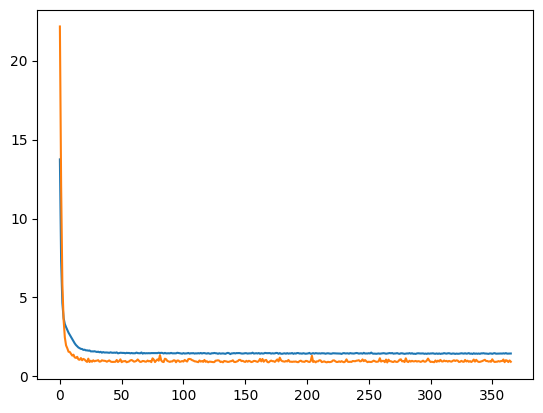

In [20]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [21]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.8636)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.7644)


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.1162499380260154
tensor([0.5385])


In [23]:
# 0.16521043602627408
# tensor([0.5385])

In [24]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

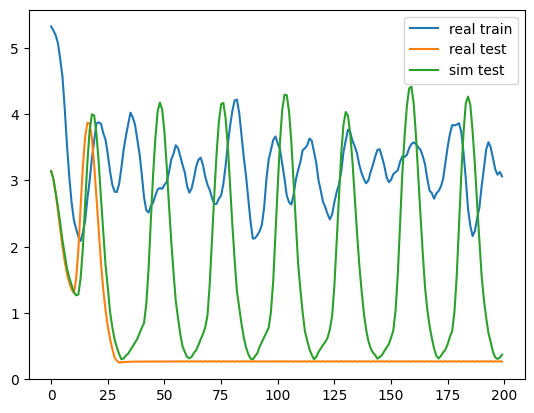

encoder [-4.3708305 -8.       ]
initial_belief tensor([-4.1149, -0.7487])
real train tensor([-4.3772, -8.0102])
real test tensor([-2.3016, -5.3459])
sim tensor([-4.3861, -8.0031])


In [25]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.428571428571429


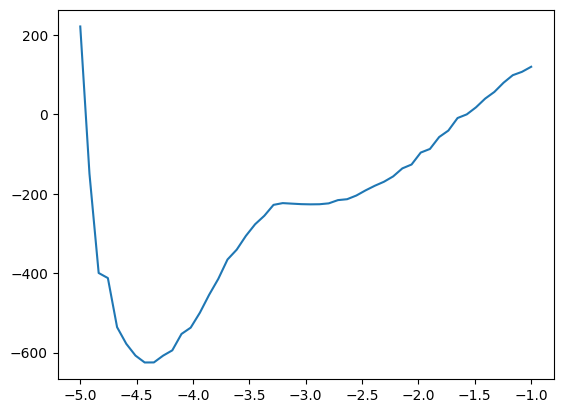

In [26]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [27]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.1276604168489911
tensor([-1.2660])
